<h1>Finding all equilibria of a two-player game: Bagwell's commitment example</h1>
<i>Theodore L. Turocy</i><br/>
<i>University of East Anglia</i>
<br/><br/>
<h3>EC'16 Workshop
24 July 2016</h3>

In [1]:
import gambit

Bagwell (1993) pointed out that the usual story of Stackelberg commitment to an action depends critically on the observability of the commitment to the action.  If there is any chance that the action might be misinterpreted, then the only equilibrium *in pure strategies* is the equilibrium of the simultaneous-move game.  He noted however that if the chance of misinterpreting the action is sufficiently small, then there is an equilibrium in mixed strategies in which the player chooses the Stackelberg action with probability arbitarily close to one.

We'll explore this example numerically, and use it as a vehicle for showing how to compute all equilibria of a two-player game.

We'll start with a quick overview of the "base" simultaneous-move game used by Bagwell in his example.  First we'll create the payoff matrix for the "leader" player:

In [2]:
import numpy
L = numpy.array([[5,3], [6,4]])
L

array([[5, 3],
       [6, 4]])

And the payoff matrix for the "follower" player:

In [3]:
F = numpy.array([[2,1], [3,4]])
F

array([[2, 1],
       [3, 4]])

The constructor `Game.from_arrays` creates a game in normal form from a collection of payoff matrices, one per player.

In [4]:
g = gambit.Game.from_arrays(L, F)
g.players[0].label = "Leader"
g.players[0].strategies[0].label = "S"
g.players[0].strategies[1].label = "C"
g.players[1].label = "Follower"
g.players[1].strategies[0].label = "S"
g.players[1].strategies[1].label = "C"
import IPython.display; IPython.display.HTML(g.write('html'))

,S,C
S,"5,2","3,1"
C,"6,3","4,4"


Here, we have set up the row player as the would-be "Leader" player (the one who would have an incentive to commit).  The strategy "S" (for both players) would be the subgame-perfect outcome if the row player had the opportunity to commit, where as we can see that "C" is going to be the unique equilibrium (obtainable by iterative elimination of strictly dominated strategies!) if players choose simultaneously.

### Aside: dominated strategies and restrictions of a game

Did someone say something about dominated strategies?  Gambit 16 contains new features for manipulating dominance information.  (These do not yet appear in the documentation for 16.0.0.)

The first concept to introduce is the `StrategySupportProfile`.  (This is a name we believe we have coined, because we cannot think of a standard termfor it.  If you know of one, please suggest!)  A support profile is a subset of strategies of a game, subject to the requirement that each player must have at least one strategy in the profile.

The function `Game.support_profile()` returns a support profile, initialized to include all strategies in the game.

In [5]:
sp = g.support_profile()
sp

[<Strategy [0] 'S' for player 'Leader' in game 'Restriction from Game '''>, <Strategy [1] 'C' for player 'Leader' in game 'Restriction from Game '''>, <Strategy [0] 'S' for player 'Follower' in game 'Restriction from Game '''>, <Strategy [1] 'C' for player 'Follower' in game 'Restriction from Game '''>]

The function `StrategySupportProfile.undominated()` determines which strategies are (strictly) dominated (taking into account only those in the SupportProfile), and returns a new `StrategySupportProfile` containing only the undominated ones.

As we expect here, strategy `S` is dominated for the Leader player, so it does not appear in the returned support profile.

In [6]:
sp.undominated()

[<Strategy [1] 'C' for player 'Leader' in game 'Restriction from Game '''>, <Strategy [0] 'S' for player 'Follower' in game 'Restriction from Game '''>, <Strategy [1] 'C' for player 'Follower' in game 'Restriction from Game '''>]

Iterating on this allows you to implement iterative elimination of strictly dominated strategies, to whatever depth you would like.

In [7]:
sp.undominated().undominated()

[<Strategy [1] 'C' for player 'Leader' in game 'Restriction from Game '''>, <Strategy [1] 'C' for player 'Follower' in game 'Restriction from Game '''>]

Of course after two rounds, we run out of things to eliminate!

In [8]:
sp.undominated().undominated().undominated() == sp.undominated().undominated()

True

The other useful concept is the `StrategicRestriction`.  A `StrategicRestriction` is a full-fledged game in its own right, derived from another game by using only a subset of its strategies.  `StrategySupportProfile` objects have a `.restrict()` member that returns a restricted game.

In [9]:
rest = sp.undominated().undominated().restrict()
rest

NFG 1 R "" { "Leader" "Follower" }

{ { "C" }
{ "C" }
}
""

4 4 


A `StrategicRestriction` remembers its "parent" or "unrestricted" game.  So while a `StrategicRestriction` is itself a game that can be manipulated in its own right, it is also possible to map e.g. mixed strategy profiles defined on a restriction of a game, to a mixed strategy profile on the corresponding unrestricted game.

In [10]:
rest.unrestrict()

NFG 1 R "" { "Leader" "Follower" }

{ { "S" "C" }
{ "S" "C" }
}
""

{
{ "" 5, 2 }
{ "" 6, 3 }
{ "" 3, 1 }
{ "" 4, 4 }
}
1 2 3 4 

In [11]:
rest.unrestrict() == g

True

### The game with imperfectly-observed commitment

Back to the main thrust of this example.  We now want to allow the Leader player to move first.  The Follower player, however, will observe the Leader's choice only with noise.  If Leader chooses `S`, then Follower will see a signal `s` with some probability $p$, and a signal `c` otherwise.  Similarly, if Leader chooses `C`, then follower will see a signal `c` with the same probability $p$, and a signal `s` otherwise.  If $p=1$ then we have the standard case of perfectly-observed Stackelberg-style commitment.

We've prepared in advance an extensive game file with $p=\frac{99}{100}$.  Here is the extensive game in pictures.
<center>
<img src="bagwell.jpg" width="70%">
</center>

In [12]:
g = gambit.Game.read_game("bagwell.efg")
g

EFG 2 R "Bagwell Commitment and Unobservability Example" { "Player 1" "Player 2" }
"Stackelberg game with imperfectly observed commitment, from Bagwell (1993)"

p "" 1 1 "" { "S" "C" } 0
c "" 1 "" { "s" 99/100 "c" 1/100 } 0
p "" 2 1 "" { "S" "C" } 0
t "" 1 "SS" { 5, 2 }
t "" 2 "SC" { 3, 1 }
p "" 2 2 "" { "S" "C" } 0
t "" 1 "SS" { 5, 2 }
t "" 2 "SC" { 3, 1 }
c "" 2 "" { "s" 1/100 "c" 99/100 } 0
p "" 2 1 "" { "S" "C" } 0
t "" 3 "CS" { 6, 3 }
t "" 4 "CC" { 4, 4 }
p "" 2 2 "" { "S" "C" } 0
t "" 3 "CS" { 6, 3 }
t "" 4 "CC" { 4, 4 }

For this example, we want to be sure we compute all equilibria.  The `lcp_solve` method we used in the poker example computes "most" equilibria.  For many games, it actually finds all of them, but there do exist games for which it will miss some out.  Fortunately, for two-player games, there is an enumeration method which is guaranteed to find all of them.  This is implemented as `gambit.nash.enummixed_solve()`.

From Gambit 16, this method (optionally) uses lrs by David Avis: http://cgm.cs.mcgill.ca/~avis/C/lrs.html, which is an excellent package (and much faster than the Gambit version written originally in the mid-1990s!).  We'll use it for this example (although for games of this size there's no meaningful speed differential.)

In [13]:
result = gambit.nash.enummixed_solve(g, use_lrs=True)
len(result)

3

So, we have multiple equilibria.  Let's inspect them.  This method actually returns mixed strategies on the strategic game (a version that uses the sequence form to do enumeration directly on the extensive game is forthcoming!):

In [14]:
result[0]

[[Fraction(0, 1), Fraction(1, 1)], [Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1)]]

We can view the behaviour equivalent using `.as_behavior()`, which does the Kuhn's Theorem calculation for us.  The first equilibrium is in pure strategies, and corresponds to the simultaneous-move outcome:

In [15]:
result[0].as_behavior()

[[[Fraction(0, 1), Fraction(1, 1)]], [[Fraction(0, 1), Fraction(1, 1)], [Fraction(0, 1), Fraction(1, 1)]]]

The second equilibrium is a low-commitment equilibrium: the probability of choosing the Stackelberg action $S$ is small:

In [16]:
result[1].as_behavior()

[[[Fraction(1, 100), Fraction(99, 100)]], [[Fraction(25, 49), Fraction(24, 49)], [Fraction(0, 1), Fraction(1, 1)]]]

And the third equilibrium is a high-commitment equilibrium: the probability of choosing the Stackelberg action $S$ is large.  So while it is indeed true that there is no pure-strategy equilibrium with full commitment, there is a mixed-strategy equilibrium with a high probability of commitment.

In [17]:
result[2].as_behavior()

[[[Fraction(99, 100), Fraction(1, 100)]], [[Fraction(1, 1), Fraction(0, 1)], [Fraction(24, 49), Fraction(25, 49)]]]

We can then make a plot, in which we vary the probability the signal "correctly" transmits Leader's action, and ask what are the probabilities the leader plays $S$ as a function (technically, correspondance) of that accuracy.

In [18]:
probs = [ gambit.Rational(i, 100) for i in xrange(99, 0, -1) ]
eqa = [ ]
for prob in probs:
    g.players.chance.infosets[0].actions[0].prob = prob
    g.players.chance.infosets[0].actions[1].prob = 1-prob
    g.players.chance.infosets[1].actions[0].prob = 1-prob
    g.players.chance.infosets[1].actions[1].prob = prob
    eqa.append([ eqm.as_behavior()[g.players[0].infosets[0].actions[0]] 
                 for eqm in gambit.nash.enummixed_solve(g, use_lrs=True) ])
    

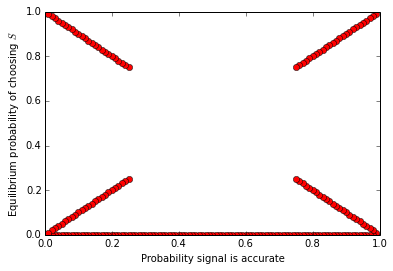

In [19]:
import pylab
%matplotlib inline
for (prob, solns) in zip(probs, eqa):
    pylab.plot([ prob for eqm in solns ], solns, 'ro')
pylab.xlabel("Probability signal is accurate")
pylab.ylabel("Equilibrium probability of choosing $S$")
pylab.show()

That's an interesting enough graph.  It shows there is a "high-commitment" equilibrium as long as $p\geq \frac{3}{4}$, or $p\leq \frac{1}{4}$.  However, game theorists will be surprised to see the two branches of the graph are not connected.  After all, we are essentially perturbing the payoffs of the game continuously as we move along the horizontal axis.

Let's have a closer look at the game when $p=\frac{3}{4}$.

In [20]:
g.players.chance.infosets[0].actions[0].prob = gambit.Rational(3,4)
g.players.chance.infosets[0].actions[1].prob = gambit.Rational(1,4)
g.players.chance.infosets[1].actions[0].prob = gambit.Rational(1,4)
g.players.chance.infosets[1].actions[1].prob = gambit.Rational(3,4)
IPython.display.HTML(g.write('html'))

,11,12,21,22
1,"5,2","9/2,7/4","7/2,5/4","3,1"
2,"6,3","9/2,15/4","11/2,13/4","4,4"


In [21]:
result = gambit.nash.enummixed_solve(g)
len(result)

3

In [22]:
result[0]

[[Fraction(0, 1), Fraction(1, 1)], [Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1)]]

In [23]:
result[1]

[[Fraction(1, 4), Fraction(3, 4)], [Fraction(0, 1), Fraction(1, 1), Fraction(0, 1), Fraction(0, 1)]]

In [24]:
result[2]

[[Fraction(3, 4), Fraction(1, 4)], [Fraction(0, 1), Fraction(1, 1), Fraction(0, 1), Fraction(0, 1)]]

We have three equilibria listed, but note that the second and third both involve the Follower (column) player choosing the same pure strategy (which is to respond to `s` with `S` and `c` with `C`).  In the game, there is a degeneracy: Leader is indifferent between `S` and `C` when Follower chooses this strategy.  You should be able to convince yourself that *any* probability distribution over `S` and `C` for Leader, with probabilities between $\frac{1}{4}$ and $\frac{3}{4}$ (on `S`) forms an equilibrium.

The enumeration method in `gambit.nash.enummixed_solve` enumerates *extreme points* of the equilibrium set. In a two-player game, the set of equilibria can be expressed as a union of convex sets.  There *is* support in Gambit for computing these convex sets - but it is not yet exposed directly via Python.

What we will do instead is to write this game out to disk, and then use the Gambit command-line tools (via Jupyter's shell magic) to inspect the output.

In [25]:
with file("bagwell-75.nfg", "w") as f:
    f.write(g.write('nfg'))

First, we'll run the `gambit-enummixed` tool on the game, and we'll see we get the same equilibria out.  The equilibria are written out in CSV for convenient parsing.

In [26]:
!gambit-enummixed bagwell-75.nfg

Compute Nash equilibria by enumerating extreme points
Gambit version 16.0.0, Copyright (C) 1994-2016, The Gambit Project
Enumeration code based on lrslib 6.2,
Copyright (C) 1995-2016 by David Avis (avis@cs.mcgill.ca)
This is free software, distributed under the GNU GPL

NE,0,1,0,0,0,1
NE,1/4,3/4,0,1,0,0
NE,3/4,1/4,0,1,0,0


The `-h` switch to any command-line tool gives a standard brief help synopsis.

In [27]:
!gambit-enummixed -h

Compute Nash equilibria by enumerating extreme points
Gambit version 16.0.0, Copyright (C) 1994-2016, The Gambit Project
Enumeration code based on lrslib 6.2,
Copyright (C) 1995-2016 by David Avis (avis@cs.mcgill.ca)
This is free software, distributed under the GNU GPL

Usage: gambit-enummixed [OPTIONS] [file]
If file is not specified, attempts to read game from standard input.
With no options, reports all Nash equilibria found.

Options:
  -d DECIMALS      compute using floating-point arithmetic;
                   display results with DECIMALS digits
  -D               don't eliminate dominated strategies first
  -L               use lrslib for enumeration (experimental!)
  -c               output connectedness information
  -h, --help       print this help message
  -q               quiet mode (suppresses banner)
  -v, --version    print version information


The option `-c` (output connectnedness information) is the one we want; it'll tell us how the three extreme equilibria listed are structured.

In [28]:
!gambit-enummixed -c bagwell-75.nfg

Compute Nash equilibria by enumerating extreme points
Gambit version 16.0.0, Copyright (C) 1994-2016, The Gambit Project
Enumeration code based on lrslib 6.2,
Copyright (C) 1995-2016 by David Avis (avis@cs.mcgill.ca)
This is free software, distributed under the GNU GPL

NE,0,1,0,0,0,1
NE,1/4,3/4,0,1,0,0
NE,3/4,1/4,0,1,0,0
convex-1,0,1,0,0,0,1
convex-2,3/4,1/4,0,1,0,0
convex-2,1/4,3/4,0,1,0,0


The set of equilibria can be expressed as two convex components.  One component is the isolated equilibrium in which Leader and Follower both play `C` (Follower playing this after both possible signals).  The other component is the one we identified above: Follower responds to signal `s` with `S` and signal `c` with `C`, and Leader mixes between his two actions.

**Advice**: It is quite easy to write down games which have positive-dimensional equilibrium sets.  Games in strategic form which derive from games in extensive form often have these naturally (because of off-path play), but equally we often write down games where the same payoff appears in multiple places in a game, making it rather easier to have degenerate situations arise.  Support for identifying these situations in Gambit in two-player games is in good shape (especially once it will be possible to manipulate the above output directly in Python).  Diagnosing these situations in games with three or more players is a bit more tricky, as we will see in a following thematic example.